### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

La varianza è: 0.9959214791937587


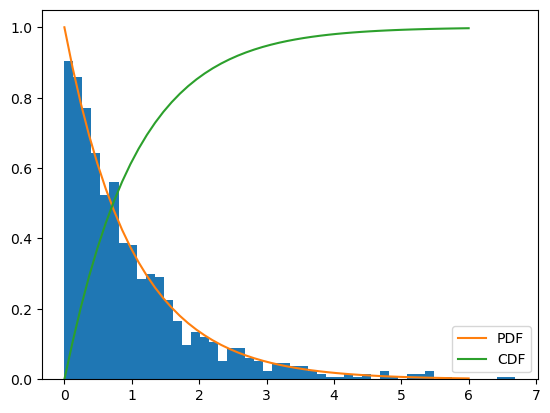

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

test=np.random.gamma(1,size=1000)           #genero 1000 numeri distribuzione gamma con parametro 1

plt.hist(test, bins=50, density=True)       #plotto la distribuzione

x=np.linspace(0,6)                  #©reo array da 0 a 6 da utilizzare per il plot successivo

dist=sp.stats.gamma(a=1)    #creo distribuzione gamma con parametro 1

plt.plot(x,dist.pdf(x),label='PDF')     #plotto la PDF

forma=sp.stats.gamma.fit(test)      #stimo i parametri 

cdf=sp.stats.gamma.cdf(x,forma[0],loc=0,scale=1)        #calcolo CDF

plt.plot(x,cdf, label='CDF')        #plotto CDF
plt.legend()

var=np.var(test,ddof=1)         #calcolo varianza

print('La varianza è:',var)


### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

Il MAE per le temp max è: 7.25
Il MAE per le temp min è: 16.381895881895883
RMSE max: 7.797984767461811
RMSE min: 18.00681904850305


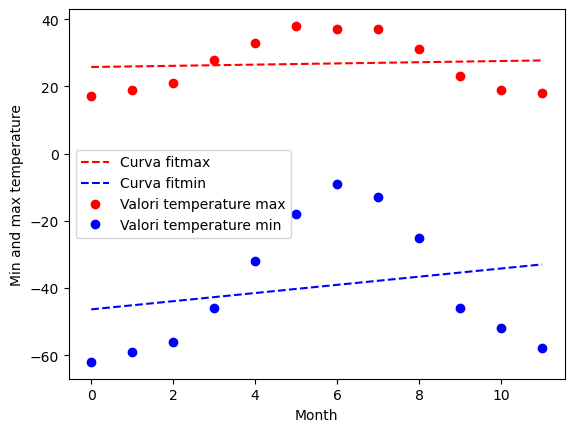

In [ ]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
months = np.arange(12)


def lineare(x,a,b):                 #funzione per regressione lineare

    return a*x+b


fit_max,_=sp.optimize.curve_fit(lineare,months,temp_max)            #eseguo fit dei dati, fit_max e fit_min sono tuple che contengono i parametri ottimizzati
fit_min,_=sp.optimize.curve_fit(lineare,months,temp_min)

pred_max=lineare(months,*fit_max)                   #faccio la previsione con i valori trovati precedentemente. *fit mi permette di spacchettare la tupla
pred_min=lineare(months,*fit_min)

plt.plot(months,pred_max, "r--",label='Curva fitmax')       #faccio il plot
plt.plot(months,pred_min,"b--",label='Curva fitmin')
plt.plot(months, temp_max, "ro",label='Valori temperature max')
plt.plot(months, temp_min, "bo",label='Valori temperature min')
plt.xlabel("Month")
plt.ylabel("Min and max temperature")
plt.legend()

mae_max=np.mean(np.abs(temp_max-pred_max))          #calcolo il mae
print("Il MAE per le temp max è:", mae_max)
mae_min=np.mean(np.abs(temp_min-pred_min))          
print("Il MAE per le temp min è:", mae_min)

rmse_max=np.sqrt(np.mean((temp_max-pred_max)**2))   #calcolo RMSE
rmse_min=np.sqrt(np.mean((temp_min-pred_min)**2))

print('RMSE max:',rmse_max)
print('RMSE min:',rmse_min)

### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

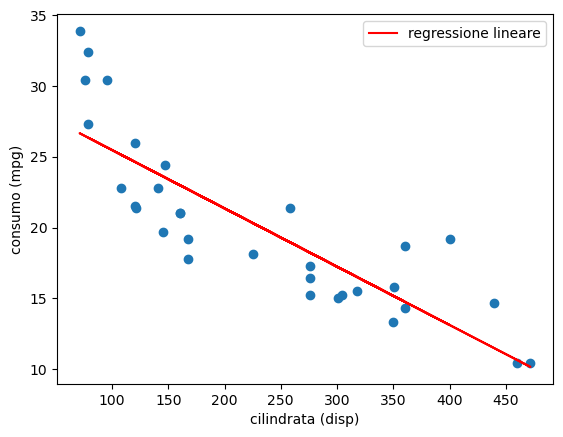

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp


# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')




def lineare(x,a,b):             #funzione per regressione lineare

    return x*a+b


fit,_=sp.optimize.curve_fit(lineare,df.mpg,df.disp)     #calcolo parametri ottimizzati
pred=lineare(df.mpg, *fit)              #calcolo previsione in base ai parametri

plt.scatter(df.mpg, df.disp)                #plotto
plt.xlabel('consumo')
plt.ylabel('cilindrata')
plt.plot(df.mpg,pred, "r-",label='regressione')
plt.legend()
plt.show()
